In [1]:
import fastf1
import fastf1.plotting

from matplotlib import pyplot as plt
import plotly.express as px
import pandas as pd

In [2]:
fastf1.Cache.enable_cache('/home/clarkem8/cache')

In [11]:
session = fastf1.get_session(2022, 'Austin', 'Q')
session.load()
df = session.laps

core           INFO 	Loading data for United States Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '16', '1', '11', '44', '63', '18', '4', '14', '77', '23', '5', '10', '24', '22', '20', '3', '31', '47', '6']


In [7]:
#df[df['DriverNumber'].isin(['44', '63'])]

In [9]:
df = px.data.gapminder().query("continent=='Oceania'")
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [18]:
fast_ham = df.pick_driver('HAM').pick_fastest()
ham_car_data = fast_ham.get_car_data()
ham_car_data['Driver'] = 'Ham'

fast_lat = df.pick_driver('LAT').pick_fastest()
lat_car_data = fast_lat.get_car_data()
lat_car_data['Driver'] = 'Lat'

In [21]:
frames = [ham_car_data, lat_car_data]
result = pd.concat(frames)[['Time', 'Speed', 'Driver']]
result

,Time,Speed,Driver
0,0 days 00:00:00.120000,230,Ham
1,0 days 00:00:00.400000,235,Ham
2,0 days 00:00:00.640000,242,Ham
3,0 days 00:00:00.880000,246,Ham
4,0 days 00:00:01.080000,248,Ham
...,...,...,...
357,0 days 00:01:36.131000,178,Lat
358,0 days 00:01:36.331000,190,Lat
359,0 days 00:01:36.571000,198,Lat
360,0 days 00:01:36.931000,211,Lat


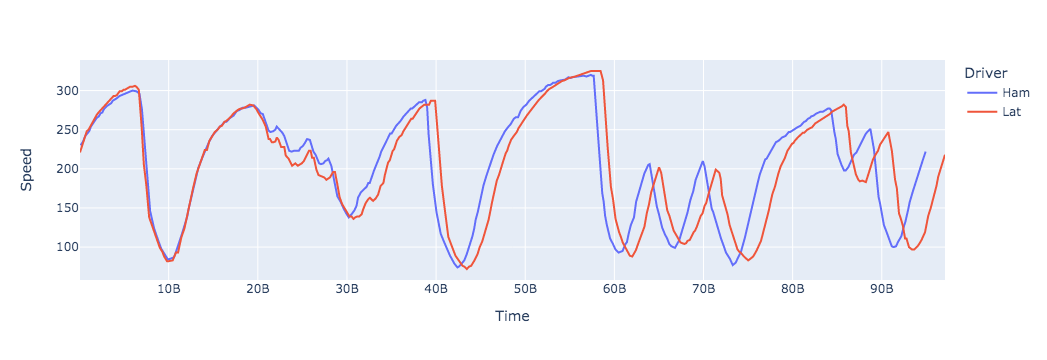

In [22]:
fig = px.line(result, x='Time', y='Speed', color='Driver')
fig.show()

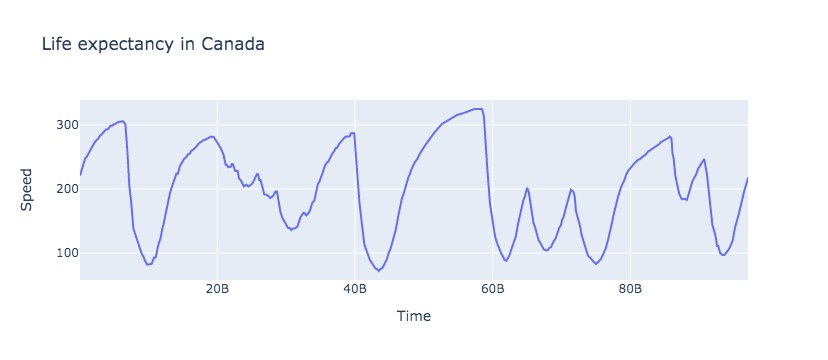

In [8]:
ham_df = ham_car_data[['Speed', 'Time']]
lat_df = lat_car_data[['Speed', 'Time']]
fig = px.line(ham_df, x="Time", y="Speed", title='Life expectancy in Canada')
fig = px.line(lat_df, x="Time", y="Speed", title='Life expectancy in Canada')

fig.show()

In [28]:
ham_car_data.iloc[-1:]
ham_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
360,2022-10-22 22:53:04.648,10820,222,5,100,False,12,car,0 days 00:01:34.921000,0 days 01:08:02.729000


In [13]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

ModuleNotFoundError: No module named 'chart_studio'

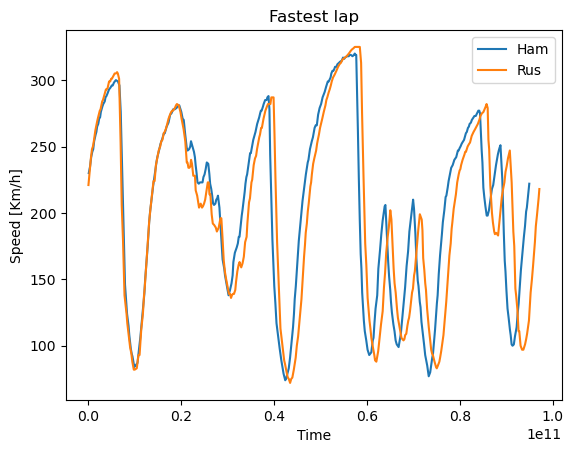

In [29]:
t_ham = ham_car_data['Time']
v_ham = ham_car_data['Speed']

t_lat = lat_car_data['Time']
v_lat = lat_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t_ham, v_ham, label='Ham')
ax.plot(t_lat, v_lat, label='Rus')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Fastest lap')
ax.legend()
plt.show()

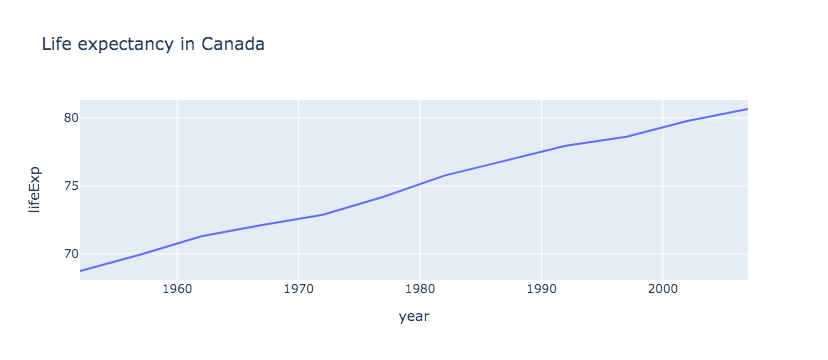

In [8]:
df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()

In [14]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

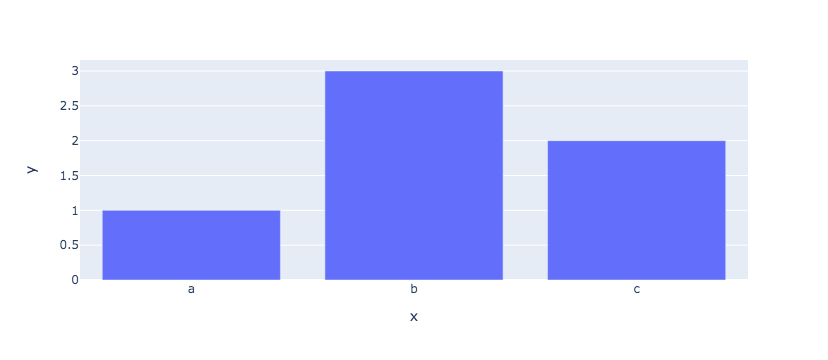

In [23]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [21]:
import dash
from dash import Dash

In [16]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive color selection with simple Dash example'),
    html.P("Select color:"),
    dcc.Dropdown(
        id="dropdown",
        options=['Gold', 'MediumTurquoise', 'LightGreen'],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], # replace with your own data source
                    marker_color=color))
    return fig


app.run_server(debug=True)

ImportError: cannot import name 'dcc' from 'dash' (/home/clarkem8/miniconda/envs/f1/lib/python3.9/site-packages/dash/__init__.py)